In [16]:
from pathlib import Path

import pydicom

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import ndimage

import imageio

from PIL import Image

In [5]:
df = pd.read_csv('../data/02_intermediate/dmd_index.csv', index_col=0)

In [6]:
features = ['group', 'treatment', 'center', 'patient', 'slice', 'modality', 'm', 'dz', 'study_no', 'timepoints']

filtered = df[(df.keep) & (df.set == 'train') & (df.treatment == 'CONTROL') & (df.slice == 'mid')][features]

filtered.head(10)

,group,treatment,center,patient,slice,modality,m,dz,study_no,timepoints
5,GROUP_1,CONTROL,UCLA,16-000297-007,mid,cine,2.0,1.6,70,30
7,GROUP_1,CONTROL,UCLA,16-000297-007,mid,tag,NaN,NaN,7,25
14,GROUP_1,CONTROL,UCLA,16-000297-015,mid,tag,NaN,NaN,8,25
15,GROUP_1,CONTROL,UCLA,16-000297-015,mid,cine,2.0,-3.6,69,30
18,GROUP_1,CONTROL,UCLA,16-000297-016,mid,tag,NaN,NaN,28,1
25,GROUP_1,CONTROL,UCLA,16-000297-002,mid,cine,2.0,1.6,94,30
26,GROUP_1,CONTROL,UCLA,16-000297-002,mid,tag,NaN,NaN,9,25
32,GROUP_1,CONTROL,UCLA,16-000297-003,mid,cine,1.0,0.0,54,30
33,GROUP_1,CONTROL,UCLA,16-000297-003,mid,tag,NaN,NaN,12,25
40,GROUP_1,CONTROL,UCLA,16-000297-004,mid,cine,2.0,1.2,83,30


In [7]:
cine_path = df.loc[5].path
tagg_path = df.loc[7].path

In [8]:
def get_images(path: str) -> np.ndarray:
    path = Path(path)
    dcm_images = [f for f in path.iterdir() if f.is_file() and f.suffix == ".dcm"]

    res = map(
        lambda ds: (ds.InstanceNumber, ds.pixel_array),
        map(pydicom.dcmread, dcm_images),
    )
    return np.array(list(zip(*sorted(res, key=lambda item: item[0])))[1])

In [13]:
tagg = get_images(tagg_path)
cine = get_images(cine_path)

print(f'Extracted tagged image {tagg.shape} and according cine {cine.shape}')

zoom_shape = tuple(np.array(tagg.shape) / np.array(cine.shape))

cine = ndimage.zoom(cine, zoom_shape)

print(f'Cine downsampled in time to {cine.shape}')

Extracted tagged image (25, 180, 224) and according cine (30, 144, 192)
Cine downsampled in time to (25, 180, 224)


/tmp/ipykernel_34766/1624603756.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(2, 1, figsize=(3, 5))
/tmp/ipykernel_34766/1624603756.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames = list(map(imageio.imread, sorted(save_path.iterdir())))


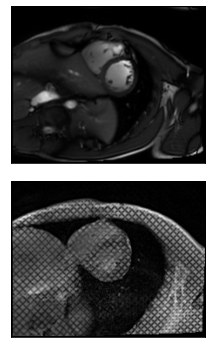

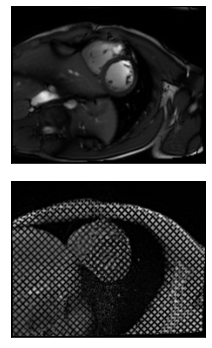

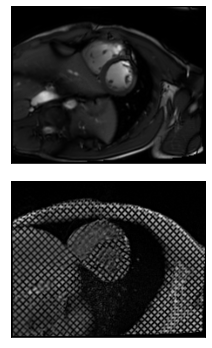

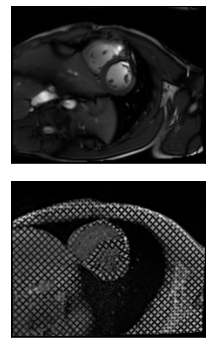

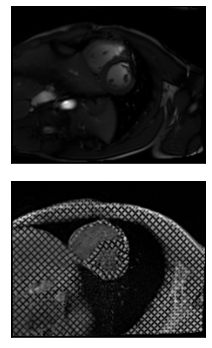

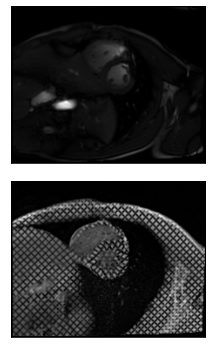

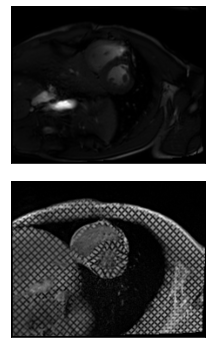

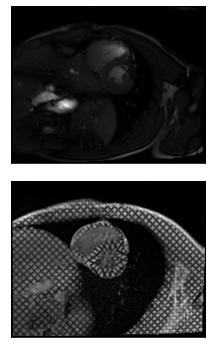

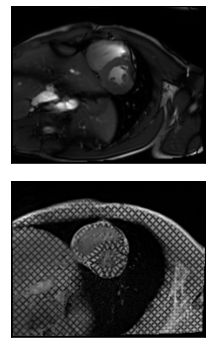

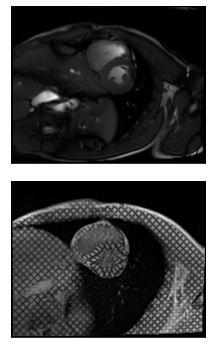

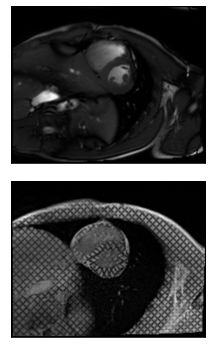

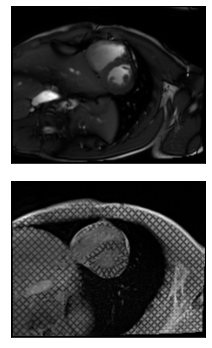

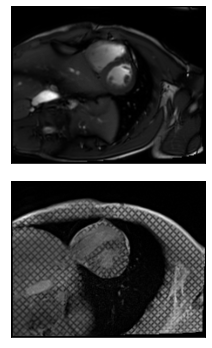

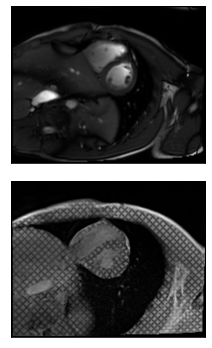

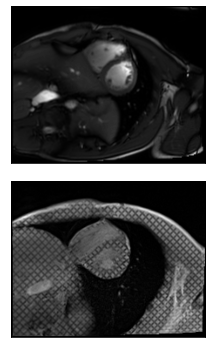

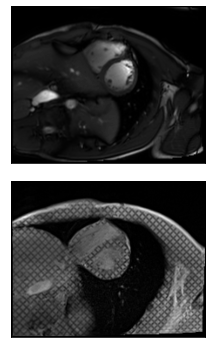

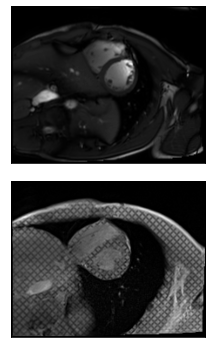

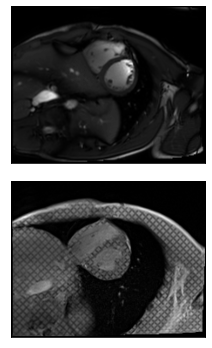

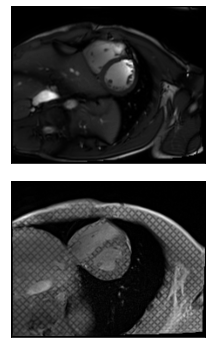

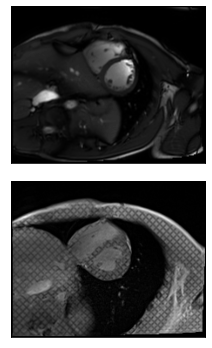

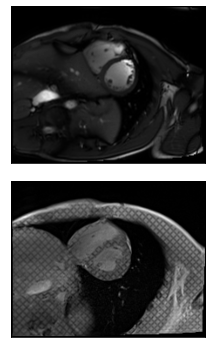

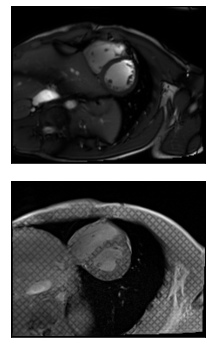

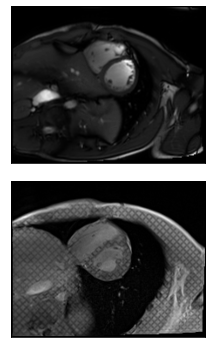

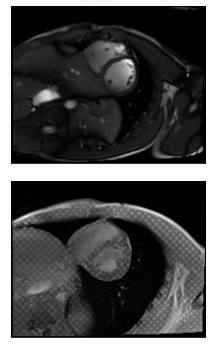

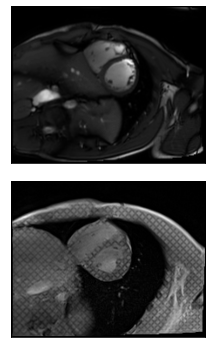

In [19]:
save_path = Path('../../figures/gifs/cine-vs-tagged')
save_path.mkdir(parents=True, exist_ok=True)

for t in range(tagg.shape[0]):
    fig, ax = plt.subplots(2, 1, figsize=(3, 5))

    ax[0].imshow(cine[t], cmap='gray')
    ax[1].imshow(tagg[t], cmap='gray')

    for axe in ax:
        axe.set_xticks([])
        axe.set_yticks([])

    plt.tight_layout()
    plt.savefig(save_path / f'time_{t:02}.png', dpi=300)

frames = list(map(imageio.imread, sorted(save_path.iterdir())))

In [20]:
imageio.mimsave('../../figures/cine_vs_tagged.gif', frames, format='GIF', duration=0.2)

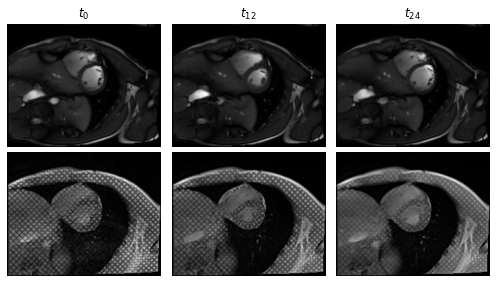

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(7, 4))

for i, t in enumerate([0, 12, 24]):
    ax[0, i].imshow(cine[t], cmap='gray'), ax[0, i].axis('off')
    ax[0, i].set_title(r'$t_{%s}$' % t)
    ax[1, i].imshow(tagg[t], cmap='gray'), ax[1, i].axis('off')

plt.tight_layout()
plt.savefig('../../figures/cine-vs-tagged.pdf', bbox_inches='tight')
plt.show()